##  Escoger solo uno de los dos códigos como base y van a hacer su propio ejemplo
Basados en el ejemplo #2 se crea el siguiente escenario:

## Escenario: Seguridad y Monitoreo en un ISP
Un ISP llamado NetWave proporciona conectividad a miles de clientes y administra una red con múltiples dispositivos como routers, switches, OLTs y servidores de autenticación (Radius). Para garantizar la seguridad y estabilidad del servicio, el equipo de monitoreo y ciberseguridad analiza registros de eventos generados por la infraestructura.
Eventos monitoreados:
•	auth_success → Autenticación exitosa de clientes.
•	auth_failure → Fallo en autenticación (posible ataque de fuerza bruta).
•	ddos_detected → Tráfico anómalo indicando posible ataque DDoS.
•	config_change → Cambio en configuración de un dispositivo de red.
•	fiber_cut_alert → Alerta por corte de fibra óptica detectado en la red.
•	high_bandwidth_usage → Cliente o IP consumiendo ancho de banda excesivo.
•	router_restart → Reinicio inesperado de un router.
•	unauthorized_access → Intento de acceso no autorizado a la red.
•	port_scan_detected → Escaneo de puertos sospechoso detectado en un servidor.
📌 Datos generados: Se registran 500 eventos durante una semana, con información como la IP origen, usuario autenticado (si aplica), severidad y si la acción fue exitosa o no.
### 📊 Visualizaciones:

### 1️⃣ Distribución de eventos en la red del ISP
### 2️⃣ Severidad de alertas generadas
### 3️⃣ Horarios con mayor actividad sospechosa
### 4️⃣ Eventos críticos por día
### 5️⃣ Mapa de calor de ataques y fallos de autenticación
### 6️⃣ Análisis de intentos de acceso no autorizado
### 7️⃣ Línea de tiempo de incidentes críticos (DDoS, cortes de fibra, accesos no autorizados, etc.)


## Dado que las librerías ya están instaladas no es necesario ejecutar el comando inicial conda install --file requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
np.random.seed(42)

In [2]:
# Definir eventos relevantes en un ISP
eventos = [
    'auth_success', 'auth_failure', 'ddos_detected', 'config_change',
    'fiber_cut_alert', 'high_bandwidth_usage', 'router_restart',
    'unauthorized_access', 'port_scan_detected'
]

In [3]:
# Generar timestamps para una semana
fechas = pd.date_range(start='2023-01-01', periods=7)
timestamps = []
for fecha in fechas:
    for hora in range(24):
        for _ in range(3):  # 3 eventos por hora aprox
            timestamps.append(fecha + pd.Timedelta(hours=hora) + 
                             pd.Timedelta(minutes=np.random.randint(60)))

timestamps = timestamps[:500]

In [4]:
# Generar IPs simuladas de clientes y equipos
clientes_ips = [f"192.168.{np.random.randint(1, 255)}.{np.random.randint(1, 255)}" for _ in range(300)]
red_isp_ips = [f"10.0.{np.random.randint(1, 255)}.{np.random.randint(1, 255)}" for _ in range(200)]
ip_origen = clientes_ips + red_isp_ips

In [5]:
# Usuarios del sistema
usuarios = ['admin', 'cliente1', 'cliente2', 'nodo1', 'router1', 'guest', None]

In [6]:
# Generar datos simulados
data = {
    'timestamp': timestamps,
    'ip_origen': np.random.choice(ip_origen, 500),
    'evento': np.random.choice(eventos, 500, p=[0.3, 0.2, 0.1, 0.05, 0.05, 0.1, 0.08, 0.07, 0.05]),
    'usuario': np.random.choice(usuarios, 500, p=[0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]),
    'severidad': np.random.choice(['low', 'medium', 'high', 'critical'], 500, p=[0.5, 0.3, 0.15, 0.05]),
    'exitoso': np.random.choice([True, False], 500, p=[0.8, 0.2]),
}

In [7]:
# Crear DataFrame
logs_df = pd.DataFrame(data)
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df = logs_df.sort_values('timestamp')

In [8]:
# Visualizaciones
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

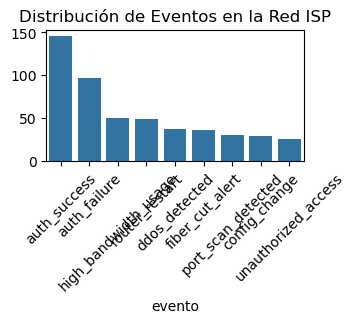

In [9]:
# 1. Distribución de eventos en la red
plt.subplot(2, 2, 1)
eventos_count = logs_df['evento'].value_counts()
sns.barplot(x=eventos_count.index, y=eventos_count.values)
plt.xticks(rotation=45)
plt.title('Distribución de Eventos en la Red ISP')
plt.tight_layout()

Text(0.5, 1.0, 'Distribución de Severidad de Eventos')

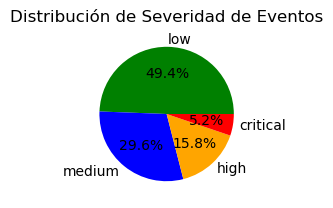

In [10]:
# 2. Severidad de eventos
plt.subplot(2, 2, 2)
severidad_count = logs_df['severidad'].value_counts()
colors = {'low': 'green', 'medium': 'blue', 'high': 'orange', 'critical': 'red'}
plt.pie(severidad_count, labels=severidad_count.index, autopct='%1.1f%%',
        colors=[colors[sev] for sev in severidad_count.index])
plt.title('Distribución de Severidad de Eventos')

Text(0, 0.5, 'Número de Eventos')

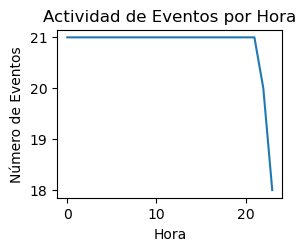

In [11]:
# 3. Actividad por hora
plt.subplot(2, 2, 3)
logs_df['hour'] = logs_df['timestamp'].dt.hour
hourly_count = logs_df.groupby('hour').size()
sns.lineplot(x=hourly_count.index, y=hourly_count.values)
plt.title('Actividad de Eventos por Hora')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')

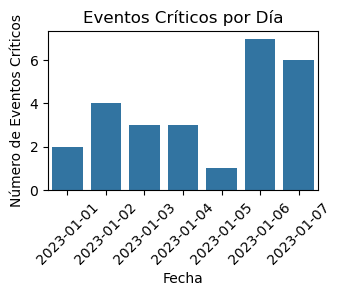

In [12]:
# 4. Eventos críticos por día
plt.subplot(2, 2, 4)
logs_df['date'] = logs_df['timestamp'].dt.date
critical_events = logs_df[logs_df['severidad'] == 'critical']
critical_count = critical_events.groupby('date').size()
sns.barplot(x=critical_count.index, y=critical_count.values)
plt.title('Eventos Críticos por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos Críticos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('isp_dashboard.png')

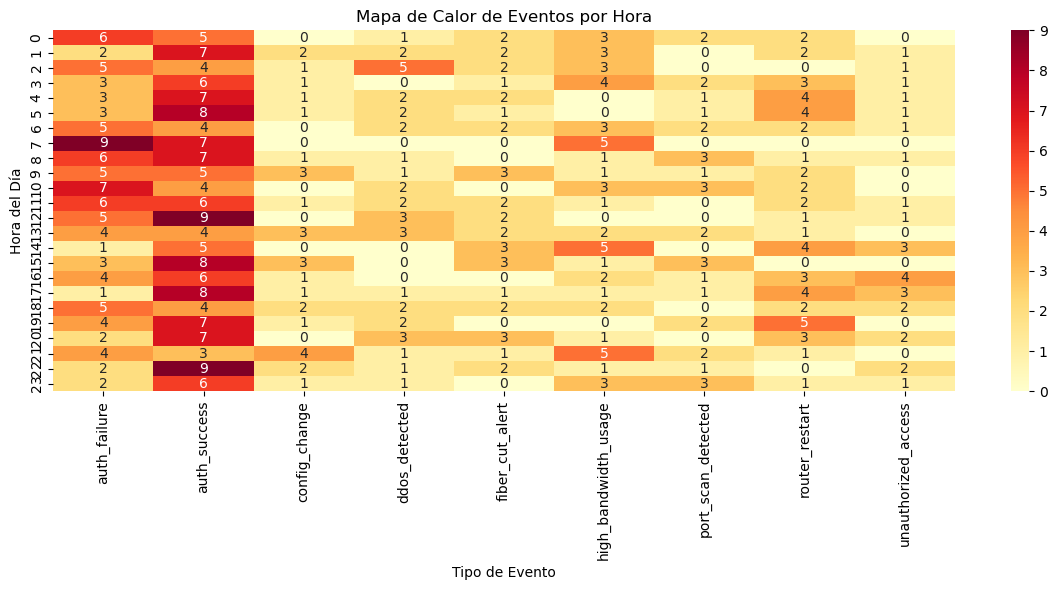

In [13]:
# Mapa de calor de actividad
plt.figure(figsize=(12, 6))
heatmap_data = pd.crosstab(logs_df['hour'], logs_df['evento'])
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Mapa de Calor de Eventos por Hora')
plt.xlabel('Tipo de Evento')
plt.ylabel('Hora del Día')
plt.tight_layout()
plt.savefig('isp_heatmap.png')

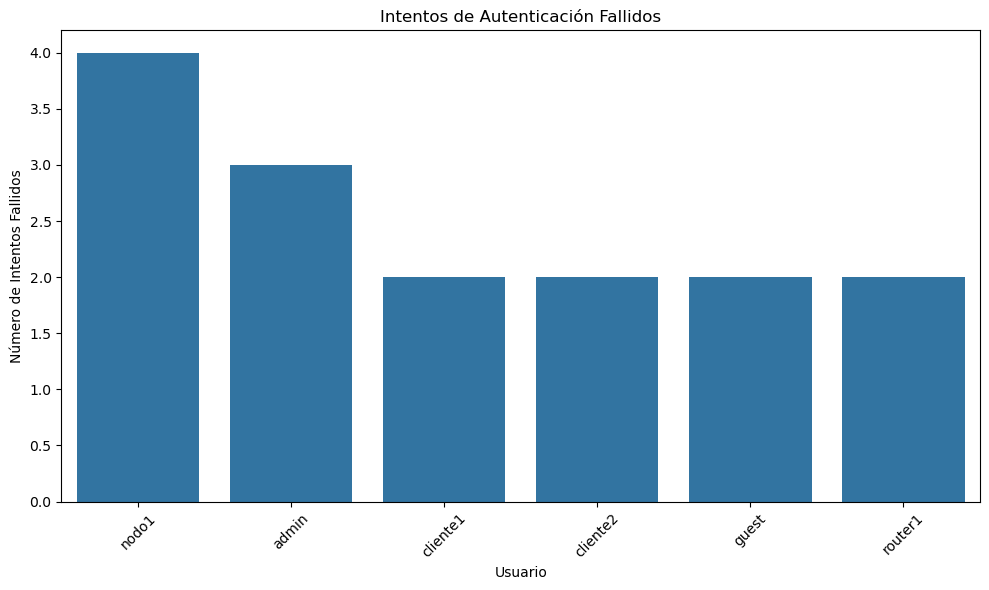

In [14]:
# Análisis de intentos fallidos
plt.figure(figsize=(10, 6))
failed_logins = logs_df[(logs_df['evento'] == 'auth_failure') & (logs_df['exitoso'] == False)]
user_failures = failed_logins['usuario'].value_counts()
sns.barplot(x=user_failures.index.fillna('anónimo'), y=user_failures.values)
plt.title('Intentos de Autenticación Fallidos')
plt.xlabel('Usuario')
plt.ylabel('Número de Intentos Fallidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('isp_failed_logins.png')

Visualizaciones generadas correctamente. Revisa los archivos .png generados.


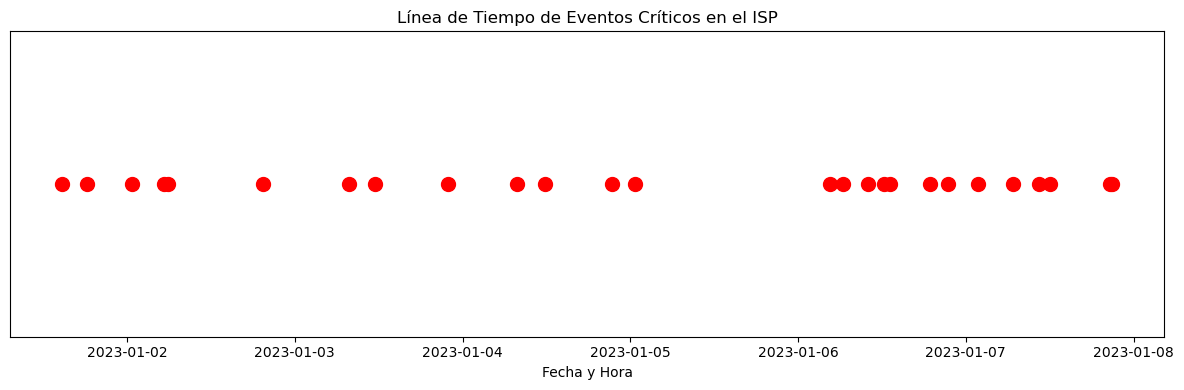

In [15]:
# Línea de tiempo de eventos críticos
plt.figure(figsize=(12, 4))
critical_events = logs_df[logs_df['severidad'] == 'critical']
plt.scatter(critical_events['timestamp'], [1]*len(critical_events), c='red', s=100)
plt.yticks([])
plt.title('Línea de Tiempo de Eventos Críticos en el ISP')
plt.xlabel('Fecha y Hora')
plt.tight_layout()
plt.savefig('isp_critical_timeline.png')

print("Visualizaciones generadas correctamente. Revisa los archivos .png generados.")